<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Tensorflow_Input_Pipeline_%7C_tf_Dataset_%7C_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

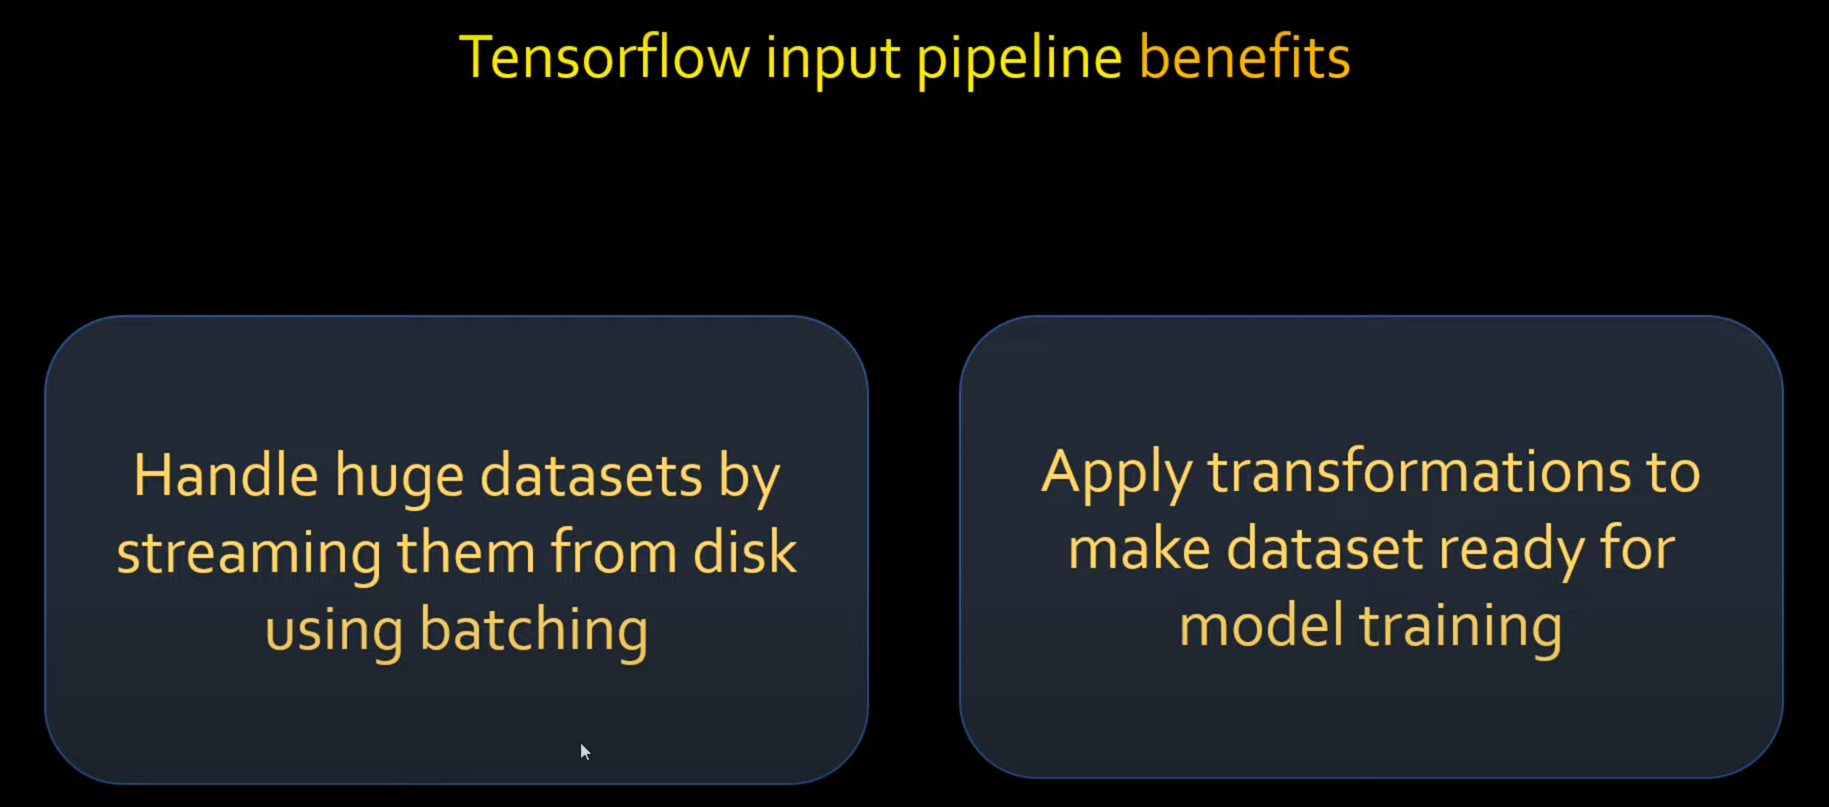

In [1]:
import tensorflow as tf


In [2]:
daily_sales_numbers = [21,22,-108,-1,32,34,31]

In [4]:
tf_dataset= tf.data.Dataset.from_tensor_slices(daily_sales_numbers)

In [5]:
print(tf_dataset)

<TensorSliceDataset shapes: (), types: tf.int32>


In [7]:
for sales in tf_dataset:
  print(sales.numpy())

21
22
-108
-1
32
34
31


In [9]:
for sales in tf_dataset.as_numpy_iterator():  # here u are doing exactly what is done above but instead of using the numpy function what we have used is 
                                              # a numpy iterator in for loop statement itself
  print(sales)

21
22
-108
-1
32
34
31


In [12]:
for sales in tf_dataset.take(3): # it will print the first 3 elements only
  print(sales.numpy())

21
22
-108


In [13]:
# for getting only positive number use filter functions
tf_dataset = tf_dataset.filter(lambda x : x>0)
for sales in tf_dataset:
  print(sales.numpy())

21
22
32
34
31


In [15]:
# convert the numbers to some other higher order 
tf_dataset = tf_dataset.map(lambda x: x*75)
for sales in tf_dataset:
  print(sales.numpy())

1575
1650
2400
2550
2325


In [17]:
# randomly shuffle the elements
tf_dataset = tf_dataset.shuffle(2)
for sales in tf_dataset:
  print(sales.numpy())

1575
1650
2325
2400
2550


https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset

In [18]:
# batching in multi gpu environment
for sales in tf_dataset.batch(2):
  print(sales.numpy())

[1575 2550]
[1650 2400]
[2325]


In [23]:
# doing everything in 1 single line

daily_sales_numbers = [21,22,-108,-1,32,34,31]
tf_dataset= tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset =tf_dataset.filter(lambda x : x>0).map(lambda y: y*75).shuffle(2).batch(2)  # when u are using 2 lambda functions keep one as x and other as y warna error aayega

for sales in tf_dataset:
  print(sales.numpy())



[1575 1650]
[2550 2400]
[2325]


In [24]:
import cv2
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


In [25]:
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/44_tf_pipelines/'

'cats - Google Search'	'dogs - Google Search'


In [32]:
images_ds= tf.data.Dataset.list_files('/content/drive/MyDrive/py-master/DeepLearningML/44_tf_pipelines/*/*', shuffle=False) # reading all cats and dogs images togather

In [33]:
for images in images_ds.take(3):
  print(images.numpy())

b'/content/drive/MyDrive/py-master/DeepLearningML/44_tf_pipelines/cats - Google Search/10 Cat Exercises Your Pet Will Enjoy....jpg'
b'/content/drive/MyDrive/py-master/DeepLearningML/44_tf_pipelines/cats - Google Search/10 Facts about Cats - Companion Animals....jpg'
b'/content/drive/MyDrive/py-master/DeepLearningML/44_tf_pipelines/cats - Google Search/10 Fascinating Facts About Cats _ Purina.jpg'


In [35]:
for images in images_ds.shuffle(3).take(3):
  print(images.numpy())

b'/content/drive/MyDrive/py-master/DeepLearningML/44_tf_pipelines/cats - Google Search/10 Cat Exercises Your Pet Will Enjoy....jpg'
b'/content/drive/MyDrive/py-master/DeepLearningML/44_tf_pipelines/cats - Google Search/10 Facts about Cats - Companion Animals....jpg'
b'/content/drive/MyDrive/py-master/DeepLearningML/44_tf_pipelines/cats - Google Search/20 Cat Facts That_ll Blow Your Kitty....jpg'


In [38]:
classes = ['cats', 'dogs']

In [39]:
image_count = len(images_ds)
image_count

100

In [43]:
train_size= int(image_count*0.8)

In [44]:
train_ds = images_ds.take(train_size) # will take 80% of the data from training
test_ds= images_ds.skip(train_size) # will skip 80% data from training, hence testing can be done

In [46]:
len(train_ds), len(test_ds)

(80, 20)

In [57]:
def get_label(file_path):
  import os
  lab0= tf.strings.split(file_path,os.path.sep)[-2]
  lab1= tf.strings.substr(lab0, 0, 3, unit='BYTE', name=None)
  return lab1

In [62]:
# getting labels of all the files so that classification can be done accordingly
for label in train_ds.map(get_label).take(5):
  print(label)

tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)


In [63]:
def process_image(file_path):
  label= get_label(file_path)
  image = tf.io.read_file(file_path)
  image = tf.image.decode_jpeg(image)
  image = tf.image.resize(image,[128,128])
  return image, label



In [ ]:
for image, label in train_ds.map(process_image).take(3):
  print(image,label)

In [66]:
def scale(image,label):
  return image/255, label

In [70]:
train_ds = train_ds.map(scale)
for image, label in train_ds.take(5):
  print('***Image :', image.numpy()[0][0])
  print('***Label :', label.numpy())

***Image : [0.8648399 0.8922909 0.9305262]
***Label : b'cat'
***Image : [0.8509804 0.8666667 0.9137255]
***Label : b'cat'
***Image : [0.17536765 0.14791666 0.12438726]
***Label : b'cat'
***Image : [0.34901962 0.3372549  0.31764707]
***Label : b'cat'
***Image : [0.8137255 0.8137255 0.8137255]
***Label : b'cat'


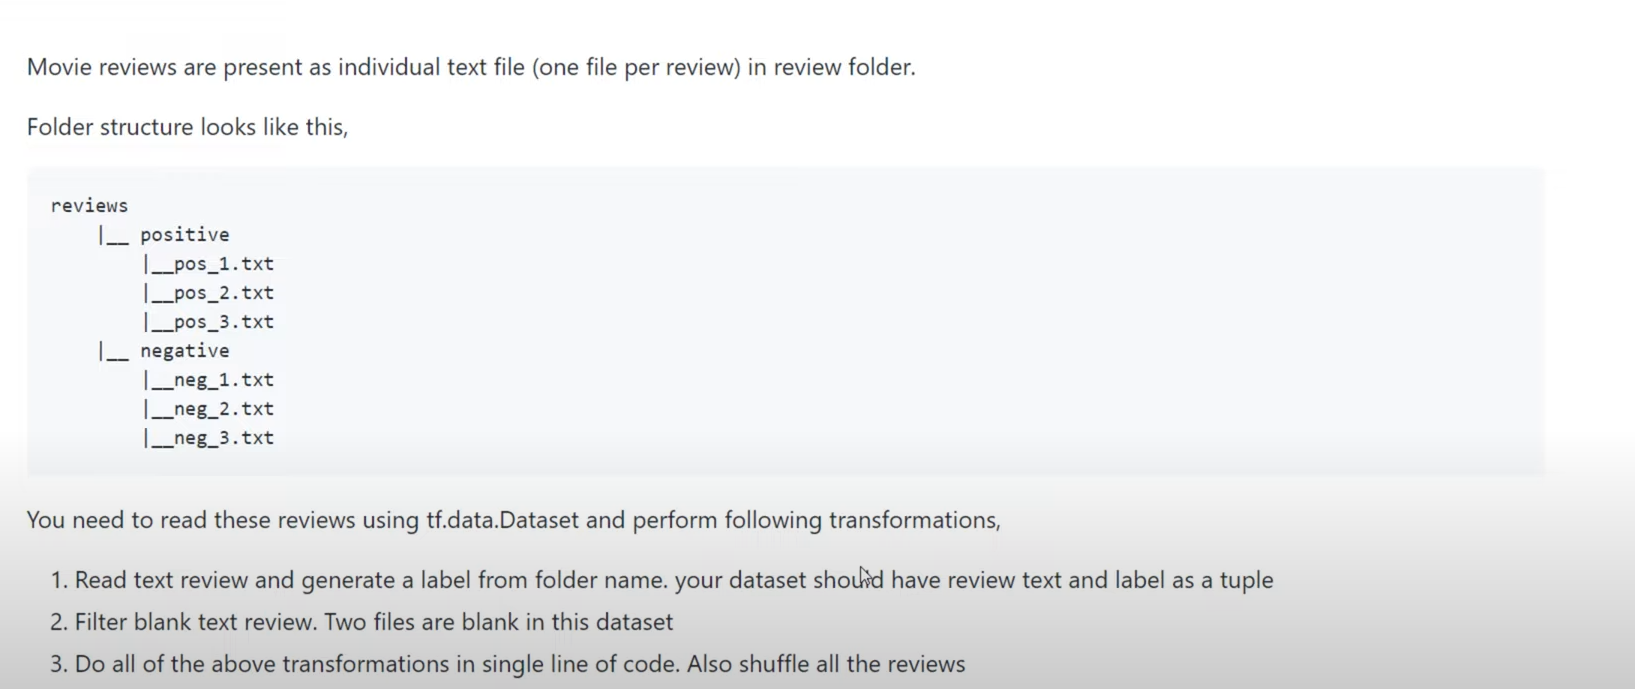